#  Bulldozers Dataset 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [163]:
from fastai.imports import *
from fastai.structured import *

import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

sns.set_style(style='darkgrid')

In [30]:
#This function finds the root mean squared log error of the predicted value against it's original value
def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_log_error(y_true, y_pred))

#print out the rmse scores and R squared scores, if the oob parameter is set, it's score is also printed
def print_score(model):
    score = [rmse(model.predict(X_train), y_train), rmse(model.predict(X_valid), y_valid),
             model.score(X_train, y_train), model.score(X_valid, y_valid)]
    if hasattr(model, 'oob_score_'):
        score.append(model.oob_score_)
    print(score)

In [31]:
PATH = '../datafiles/bulldozers/'

In [32]:
ls {PATH}

Train.csv


###  Loading file 

In [33]:
df_raw  = pd.read_csv(f'{PATH}/Train.csv', parse_dates=True, low_memory=False, sep=',')

In [34]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401123,6333341,9000,1903570,21435,149,2.0,2005,NaN,NaN,10/25/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [35]:
# Changing the SalePrice to it's log form ; check this later
# df_raw['SalePrice'] = np.log(df_raw['SalePrice'])

In [36]:
add_datepart(df_raw, 'saledate')

In [37]:
train_cats(df_raw)
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [38]:
df_train, y, nas = proc_df(df_raw, 'SalePrice')

###  Spliting the data into training and validation sets

In [39]:
def split_sets(data, split_num):
    return data[split_num:].copy(), data[:split_num].copy()

In [40]:
# Producing the training and test sets
split = 12000
X_train, X_valid = split_sets(df_train, split_num = split)
y_train, y_valid = split_sets(y, split_num=split)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((389125, 66), (12000, 66), (389125,), (12000,))

###  Building Models

In [41]:
set_rf_samples(50000)

In [42]:
model = RandomForestRegressor(n_jobs=-1).fit(X_train, y_train)
print_score(model)

[0.08346058942447121, 0.2506240927996427, 0.9878748924261248, 0.8611852896659715]


In [44]:
model = RandomForestRegressor(n_estimators=1, max_features=0.5, min_samples_leaf=3, n_jobs=-1)
model.fit(X_train, y_train)
print_score(model)

[0.20293796657722832, 0.3371136421964891, 0.9101508723876314, 0.7375157855097925]


In [173]:
model = RandomForestRegressor(n_estimators=30, max_features=0.5, min_samples_leaf=10, n_jobs=-1, oob_score=True)
model.fit(X_train, y_train)
print_score(model)

[0.19390212654769598, 0.24106585170265193, 0.9229901981215621, 0.8857713708758246, 0.8955987617083316]


###  Feature Importance

In [121]:
fi = rf_feat_importance(model, df_train)
#print out the top 16 important features
fi[:16]

,cols,imp
5,YearMade,0.201313
13,ProductSize,0.149591
19,Enclosure,0.097873
10,fiSecondaryDesc,0.070311
63,saleElapsed,0.063286
14,fiProductClassDesc,0.053219
8,fiModelDesc,0.045354
2,ModelID,0.042429
0,SalesID,0.031332
9,fiBaseModel,0.030667


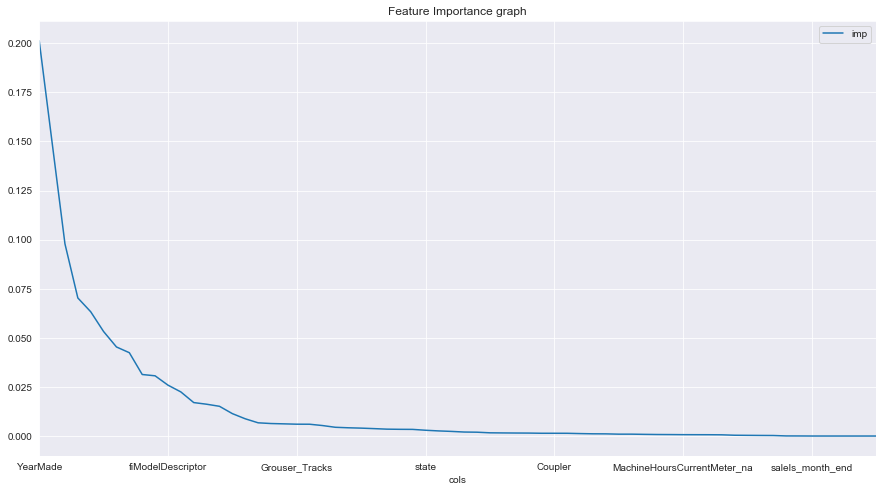

In [122]:
fi.plot('cols', 'imp', kind='line', figsize=(15, 8))
plt.title('Feature Importance graph')
plt.show()

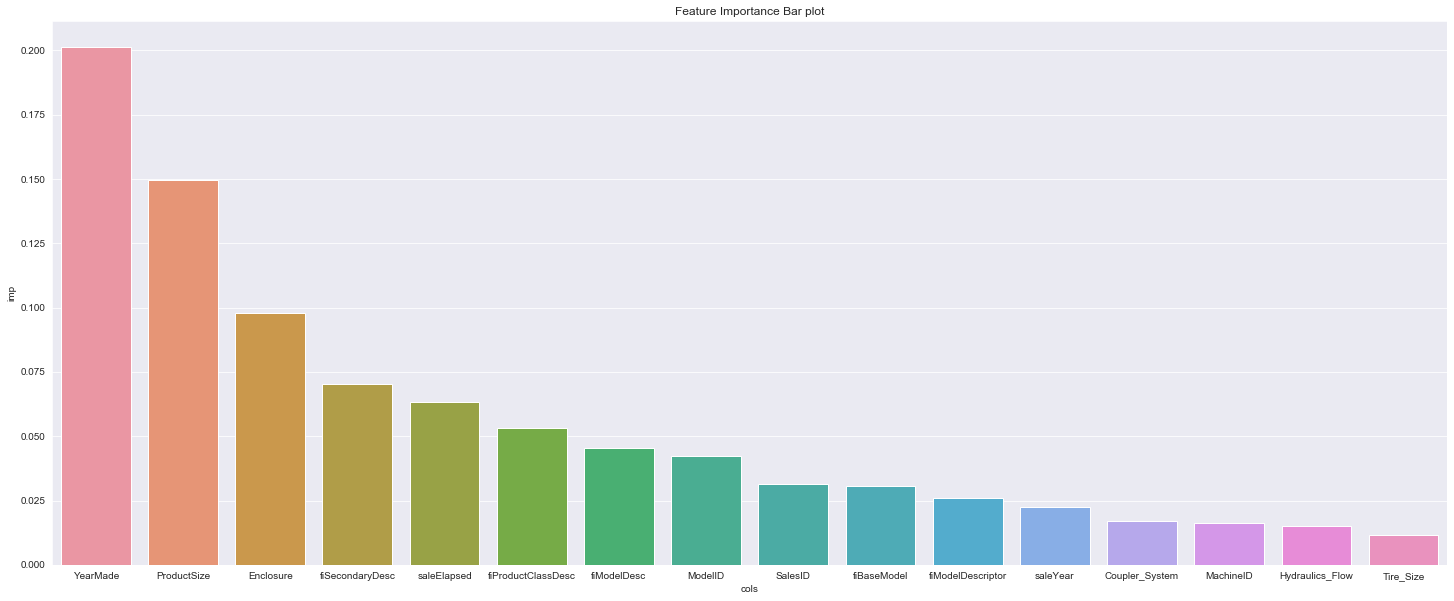

In [117]:
fi = fi[:16]
plt.figure(figsize=(25,10))
sns.barplot(fi.cols, fi.imp, data=fi)
plt.title('Feature Importance Bar plot')
plt.show()

In [141]:
new_fi = fi[fi.imp > 0.015].cols
len(new_fi)

15

In [142]:
df_new = df_train[new_fi].copy()
X_train, X_valid = split_sets(df_new, 12000)

In [143]:
# New model based on the important features
model = RandomForestRegressor(n_estimators=25, max_features=0.5, min_samples_leaf=10,oob_score=True, n_jobs=-1)
model.fit(X_train, y_train)
print_score(model)

/home/eclipse/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[0.19383726568775297, 0.24064626241059028, 0.9229764357422924, 0.8870601634530193, 0.8947920819935825]


In [146]:
df_new

,YearMade,ProductSize,Enclosure,fiSecondaryDesc,saleElapsed,fiProductClassDesc,fiModelDesc,ModelID,SalesID,fiBaseModel,fiModelDescriptor,saleYear,Coupler_System,MachineID,Hydraulics_Flow
0,2004,0,3,41,1163635200,59,950,3157,1139246,296,0,2006,0,999089,0
1,1996,4,3,55,1080259200,62,1725,77,1139248,527,0,2004,0,117657,0
2,2001,0,6,0,1077753600,39,331,7009,1139249,110,0,2004,1,434808,3
3,2001,6,3,0,1305763200,8,3674,332,1139251,1375,0,2011,0,1026470,0
4,2007,0,1,0,1248307200,40,4208,17311,1139253,1529,0,2009,1,1057373,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,2005,5,1,106,1320192000,17,657,21439,6333336,207,0,2011,0,1840702,0
401121,2005,5,1,106,1320192000,17,657,21439,6333337,207,0,2011,0,1830472,0
401122,2005,5,1,106,1320192000,17,657,21439,6333338,207,0,2011,0,1887659,0
401123,2005,5,1,106,1319500800,13,483,21435,6333341,159,0,2011,0,1903570,0


###  Removing redundant features

In [149]:
fi =rf_feat_importance(model, df_new)
fi

,cols,imp
0,YearMade,0.194878
1,ProductSize,0.173779
2,Enclosure,0.093339
3,fiSecondaryDesc,0.079477
5,fiProductClassDesc,0.074144
6,fiModelDesc,0.065401
4,saleElapsed,0.063962
9,fiBaseModel,0.052326
7,ModelID,0.050018
8,SalesID,0.035240


In [150]:
from scipy.cluster import hierarchy as hc

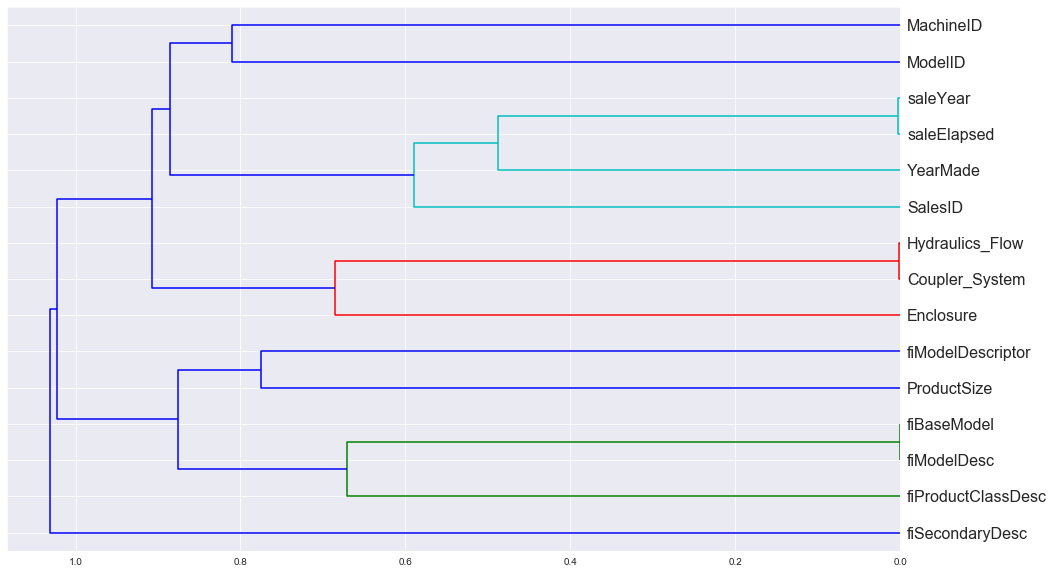

In [151]:
corr = np.round(scipy.stats.spearmanr(df_new).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_new.columns, orientation='left', leaf_font_size=16)
plt.show()

In [170]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=50, max_features=None, min_samples_leaf=3,oob_score=True, n_jobs=-1)
    x, _ = split_sets(df_new, 12000)
    m.fit(x, y_train)
    return m.oob_score_

In [171]:
get_oob(df_new)

0.9025729008570067

In [172]:
to_check = ['saleYear', 'saleElapsed', 'fiBaseModel', 'fiModelDesc', 'Hydraulics_Flow', 'Coupler_System']
for c in to_check:
    print(c, get_oob(df_new.drop(c, axis=1)))

saleYear 0.9025350048046484
saleElapsed 0.9026398189679379
fiBaseModel 0.9023078193999959
fiModelDesc 0.9027422768445432
Hydraulics_Flow 0.9024957972999378
Coupler_System 0.9026220457892079


In [174]:
to_drop = ['saleYear', 'fiBaseModel', 'Hydraulics_Flow']
get_oob(df_new.drop(to_drop, axis=1))

0.9025572636151783

###  New Model with some features removed

In [175]:
X_train, X_valid = split_sets(df_new.drop(to_drop, axis=1), 12000)

In [176]:
model = RandomForestRegressor(n_estimators=50, max_features=0.5, min_samples_leaf=3,oob_score=True, n_jobs=-1)
model.fit(X_train, y_train)
print_score(model)

[0.14400134847652912, 0.23625391053724698, 0.959070543145068, 0.8895362696121797, 0.9045559596718906]
